## Data Preparation and Preprocessing

### Importing Libraries and Dependencies

In [1]:
%pip install opencv-python
%pip install matplotlib
%pip install imutils
%matplotlib inline
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import imutils
import matplotlib.pyplot as plt
import os
import numpy as np

### Cropping and Noise Handling

To enrich the data that is going into our networks, we zoomed into our important data by cropping out insignificant data in our images (blanks spaces not near the brain). We used a cropping technique to find the extreme ends (top, bottom, left, right) of the brain contours and used them to crop out the rest of the image. 
Reference article used: https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/

In [3]:
def crop_brain_region(image, plot=False):
    """Function for Image Cropping and Noise Elimination"""

    # IMG grayed (focus on intensity variations)
    grayed_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # IMG blurred (smoother and noise reduction), applied a kernel of 5,5 and sigma of
    blurred_img = cv2.GaussianBlur(grayed_img, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise

    # IMG threshold to segregate image binary regions based on pixel intensity, separate objects of interests from background, used 45 avg threshold value, 255 max value
    threshed_img = cv2.threshold(blurred_img, 45, 255, cv2.THRESH_BINARY)[1]
    # IMG eroded then dilated to first remove noise (by shrinking or eroding boundaries of objects) then enlarge again to original object boundaries
    eroded_img = cv2.erode(threshed_img, None, iterations=2)
    dilated_img = cv2.dilate(eroded_img, None, iterations=2)

    # Find contours in thresholded image
    cnts = cv2.findContours(dilated_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Grab the largest contour
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Define the extreme points of the contours (used to determine where to crop)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]        

    # Optional plotting for visualization
    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')

        plt.show()
    return new_image

### Loading inputs and labels, Resizing and Normalizations

In [4]:
def process_image_directory(directory, label, x, y):
    """Function used to process images from data directories to assign them to the x_input and y_output variables"""

    # Define image size as 224 x 224 pixel size
    image_size = (224,224)

    # Traverse through the data directory
    for filename in os.listdir(directory):
        # Traverse through each image within each directory
        filepath = os.path.join(directory, filename)
        image = cv2.imread(filepath)
        # Crops brain, resizes images and normalizes values
        if image is not None:
            image = crop_brain_region(image, plot=False)
            image = cv2.resize(image, dsize=image_size, interpolation=cv2.INTER_CUBIC)
            # Normalize values to a range between 0 and 1 instead of 0 - 255
            image = image / 255.0
            # Append the image and its corresponding labels label to the x input and y output lists
            x.append(image)
            y.append(label)

In [5]:
# Each processed images are stored here
x_input = [] 
# Each images' corresponding labels are stored here
y_output = []       

# Process and Load all the images into the x and y variables
process_image_directory("data/notumor", 0, x_input, y_output)
process_image_directory("data/glioma", 1, x_input, y_output)
process_image_directory("data/meningioma", 2, x_input, y_output)
process_image_directory("data/pituitary", 3, x_input, y_output)

# Convert lists to numpy arrays
x_input_np = np.array(x_input)
y_output_np = np.array(y_output)

# Sample output
print(x_input_np)
print(y_output_np)


# Get rough dimensions (number of data, pixel sizes) of the data
print(x_input_np.shape)
print(y_output_np.shape)

[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0. 

In [6]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for each unique label in y.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    # Define a mapping from label to string representation
    label_to_str = {0: "No Tumor", 1: "Glioma", 2: "Meningioma", 3: "Pituitary"}
    
    # Iterate over all unique labels in y
    for label in np.unique(y):
        # Grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(np.ceil(n / columns_n))

        plt.figure(figsize=(20, 10))
        
        i = 1  # Current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # Remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        plt.suptitle(f"Tumor Type: {label_to_str[label]}")
        plt.show()

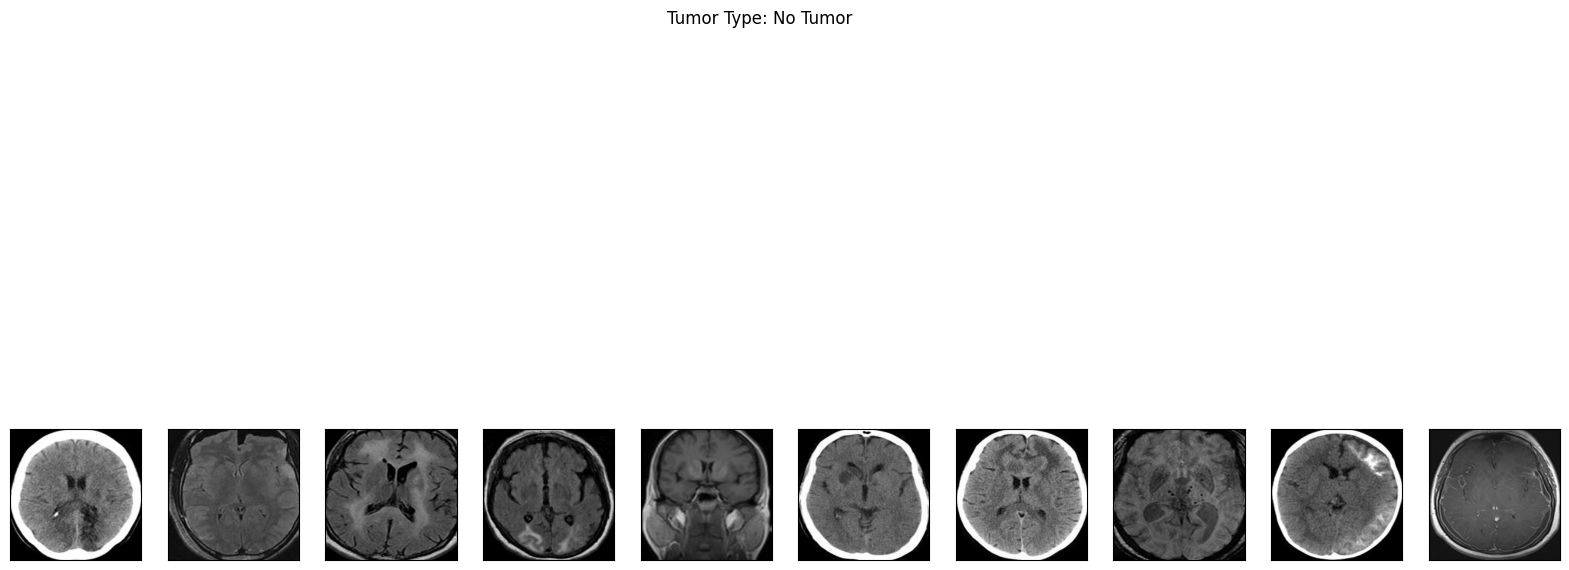

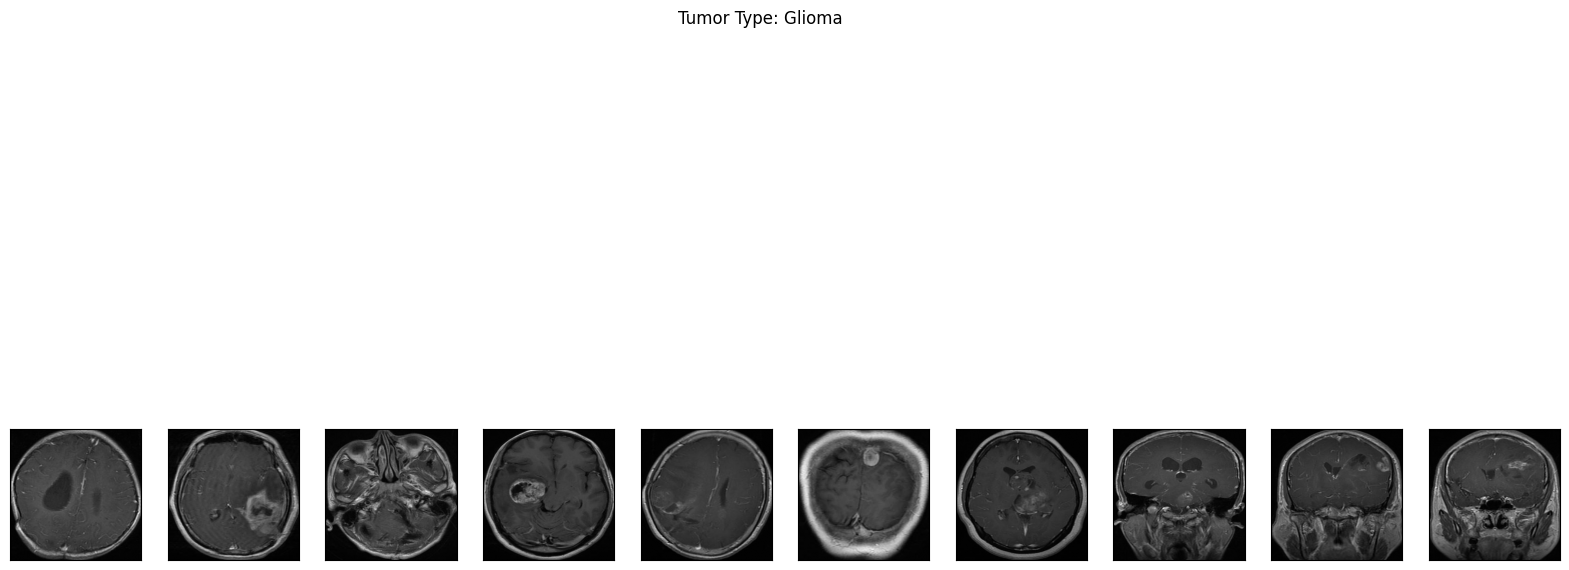

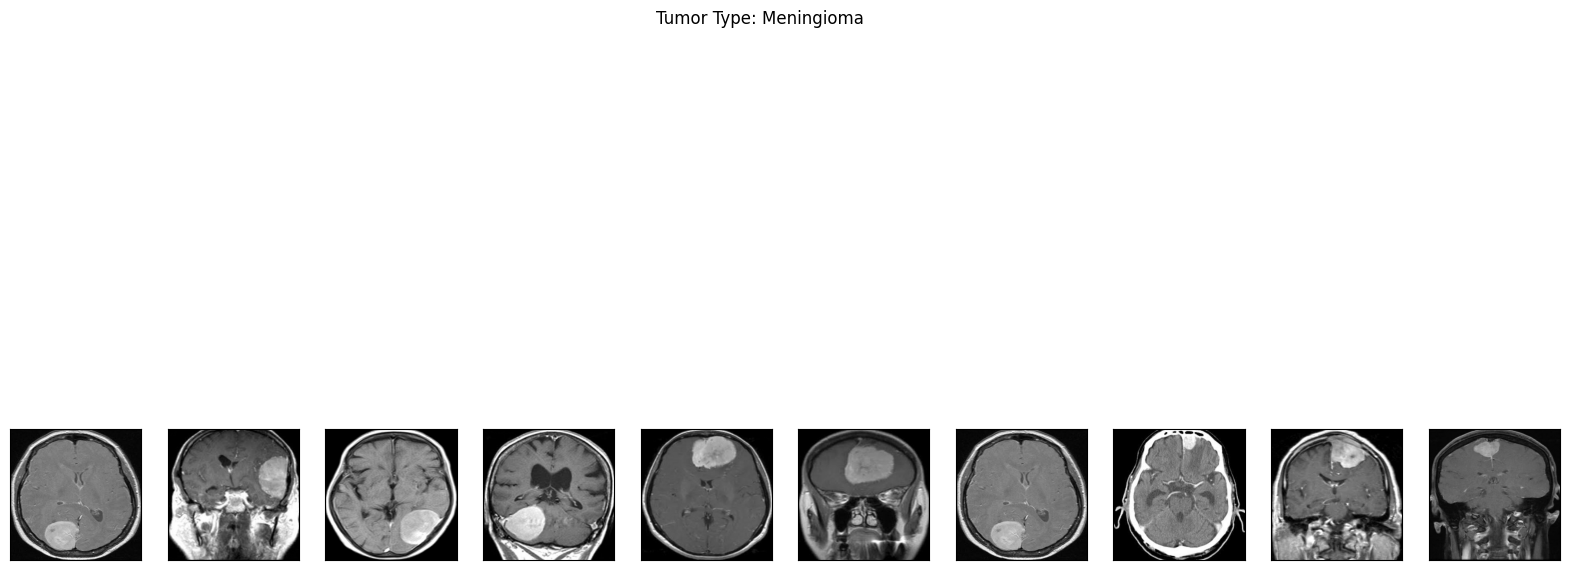

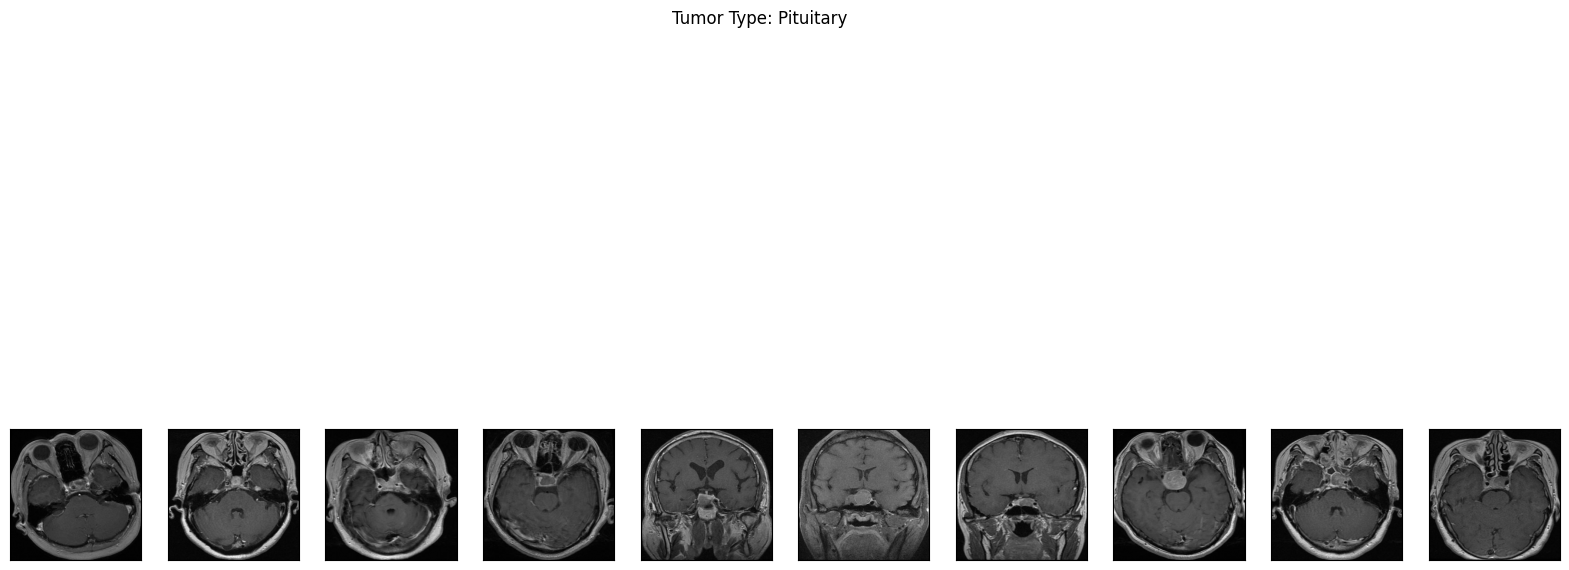

In [7]:
# Samples of 10 images of original data from each class
plot_sample_images(x_input_np, y_output_np, n=10)

### Data Augmentation

To obtain a bigger dataset by 300% for better model performance and to avoid overfitting, we decided to augment our original data by
- Randomly Rotating our original Images from -25 to 25 degrees
- Vertically Flipped our original images
- Horziotally Flipped our original images

In [8]:
def random_rotate(image, max_angle=25):
    """Function that return an img that has been randomly rotated between -25 to 25 degrees"""
    # Generate a random angle between -25 to 25 degrees
    angle = np.random.uniform(-max_angle, max_angle)
    rows, cols, _ = image.shape
    # Rotate the image
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def augment_data(images, labels):
    """Function that augment all images and returns all augments and its labels"""
    # Stores augmented images
    augmented_images  = []
    # Stores labels of corresponding augmented images
    augmented_labels = []

    for img, label in zip(images, labels):
        # Create a vertically flipped version
        vertical_flip = np.flipud(img)
        augmented_images.append(vertical_flip)
        augmented_labels.append(label)

        # Create a horizontally flipped version
        horizontal_flip = np.fliplr(img)
        augmented_images.append(horizontal_flip)
        augmented_labels.append(label)

        # Create a randomly rotated version
        random_rotation = random_rotate(img)
        augmented_images.append(random_rotation)
        augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

In [9]:
# Augment your input data
augmented_x_input_np, augmented_y_output_np = augment_data(x_input_np, y_output_np)

# Get rough dimensions of augmented data
print(augmented_x_input_np.shape)
print(augmented_y_output_np.shape)

(1440, 224, 224, 3)
(1440,)


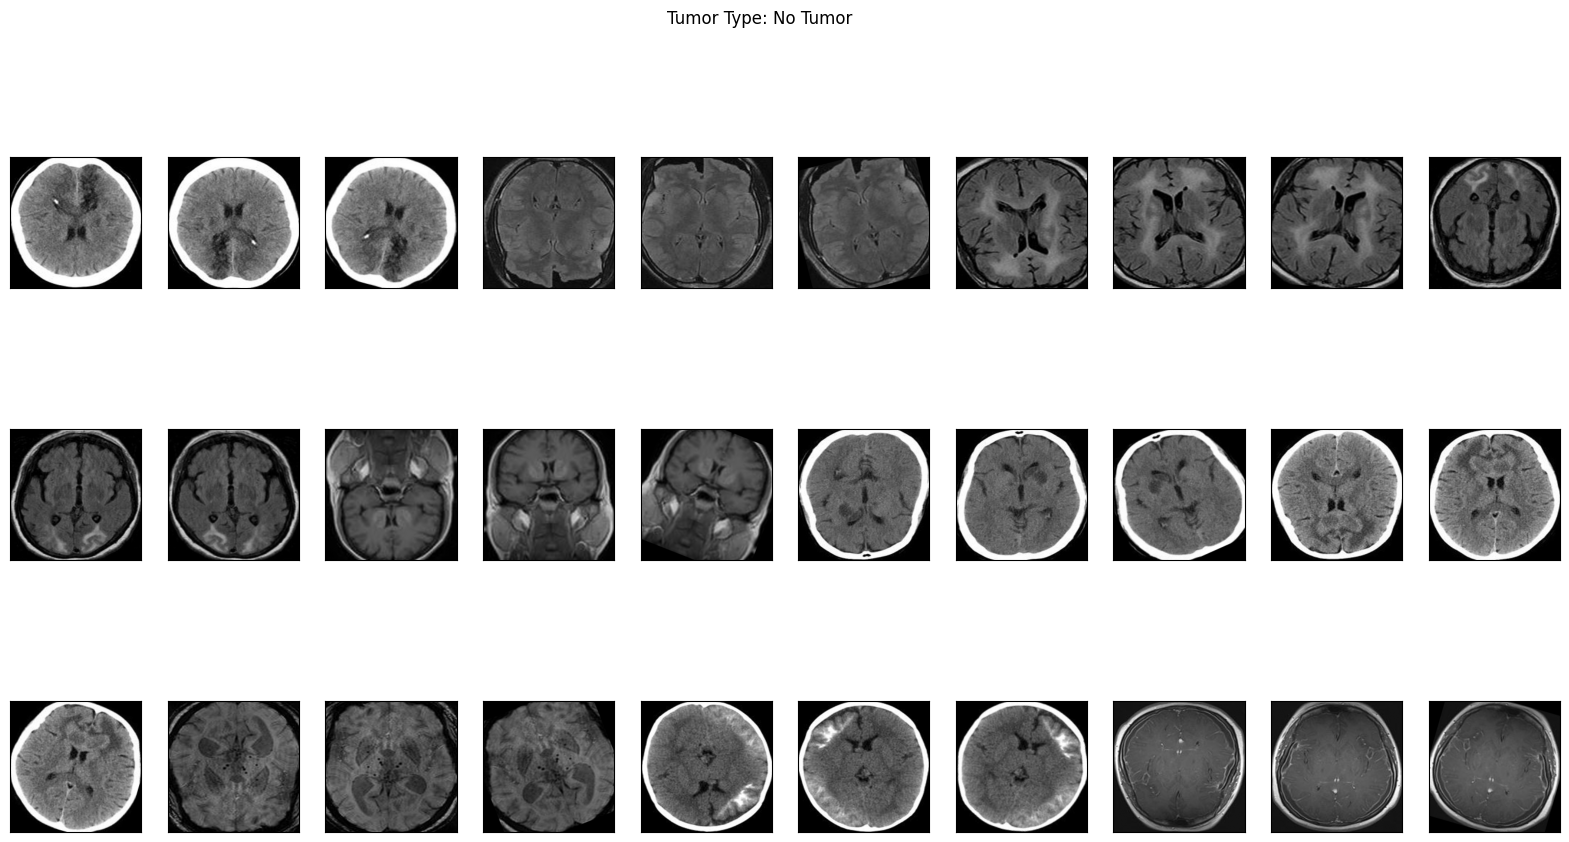

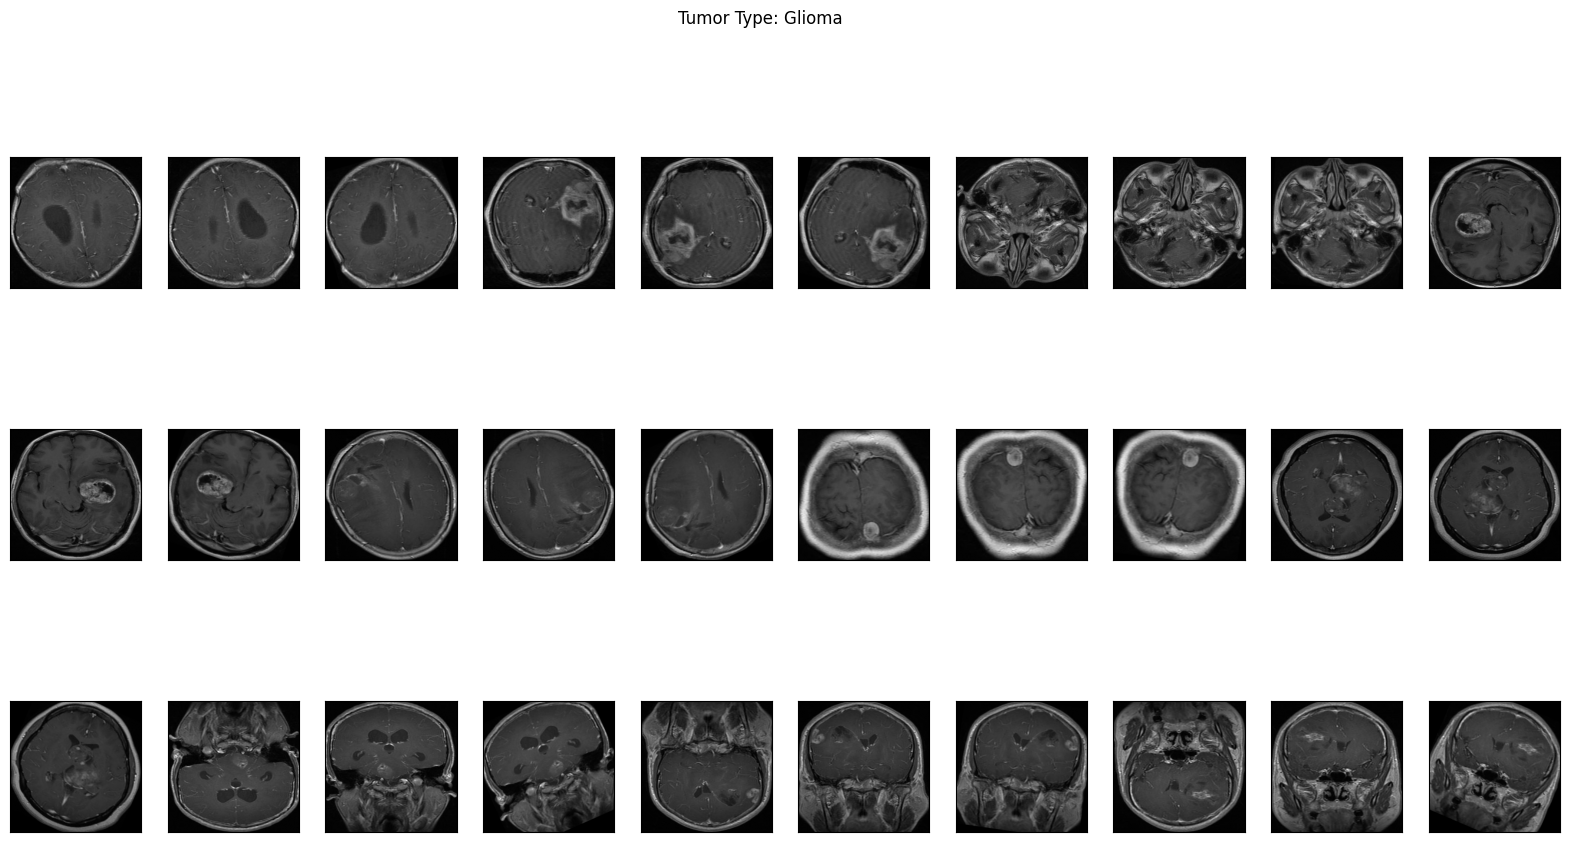

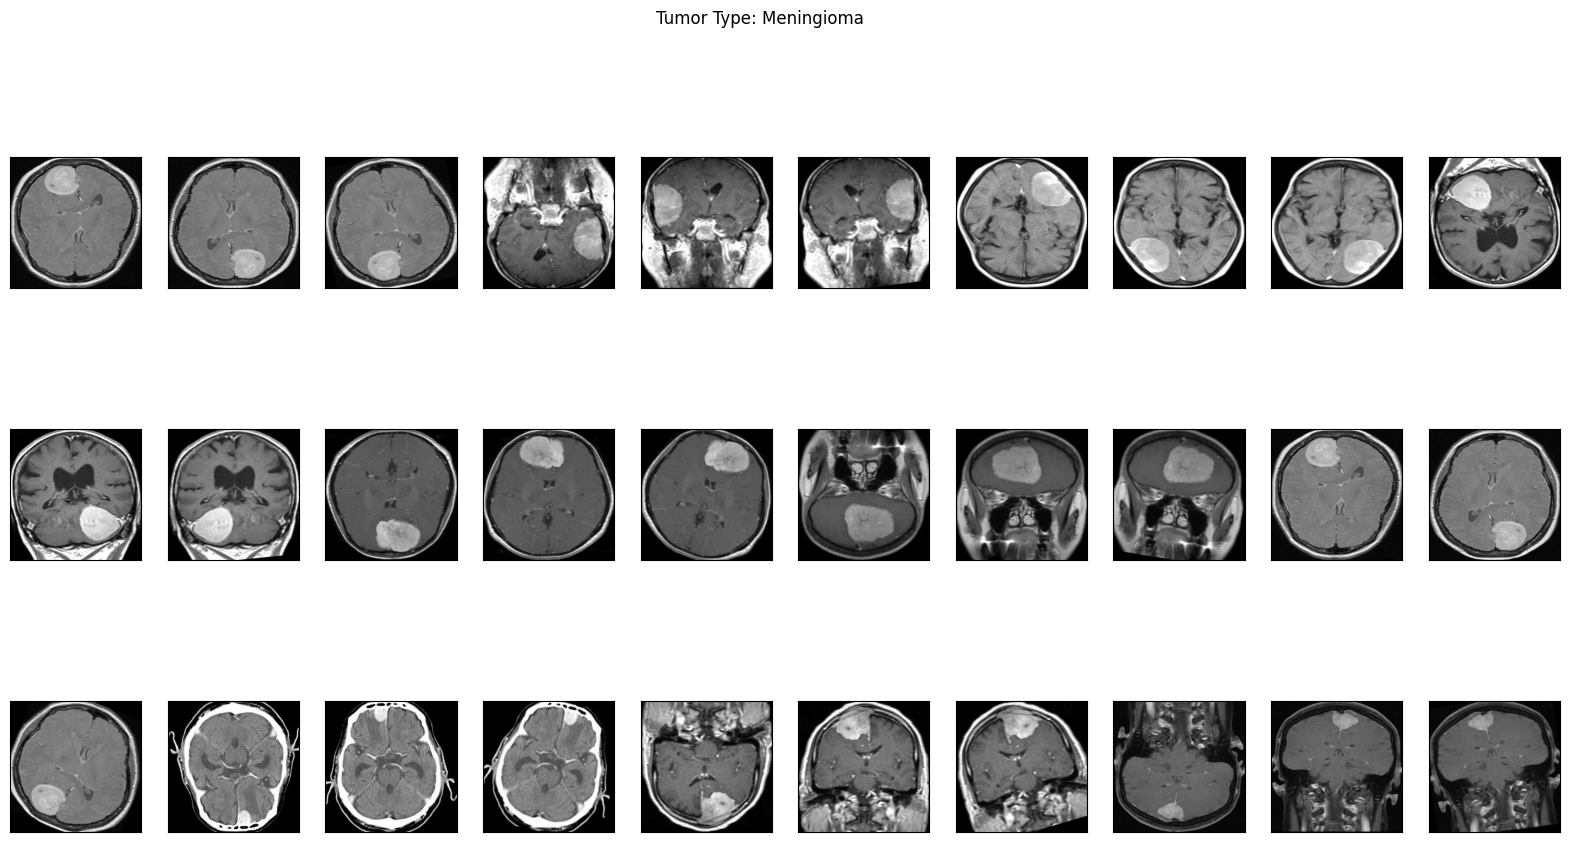

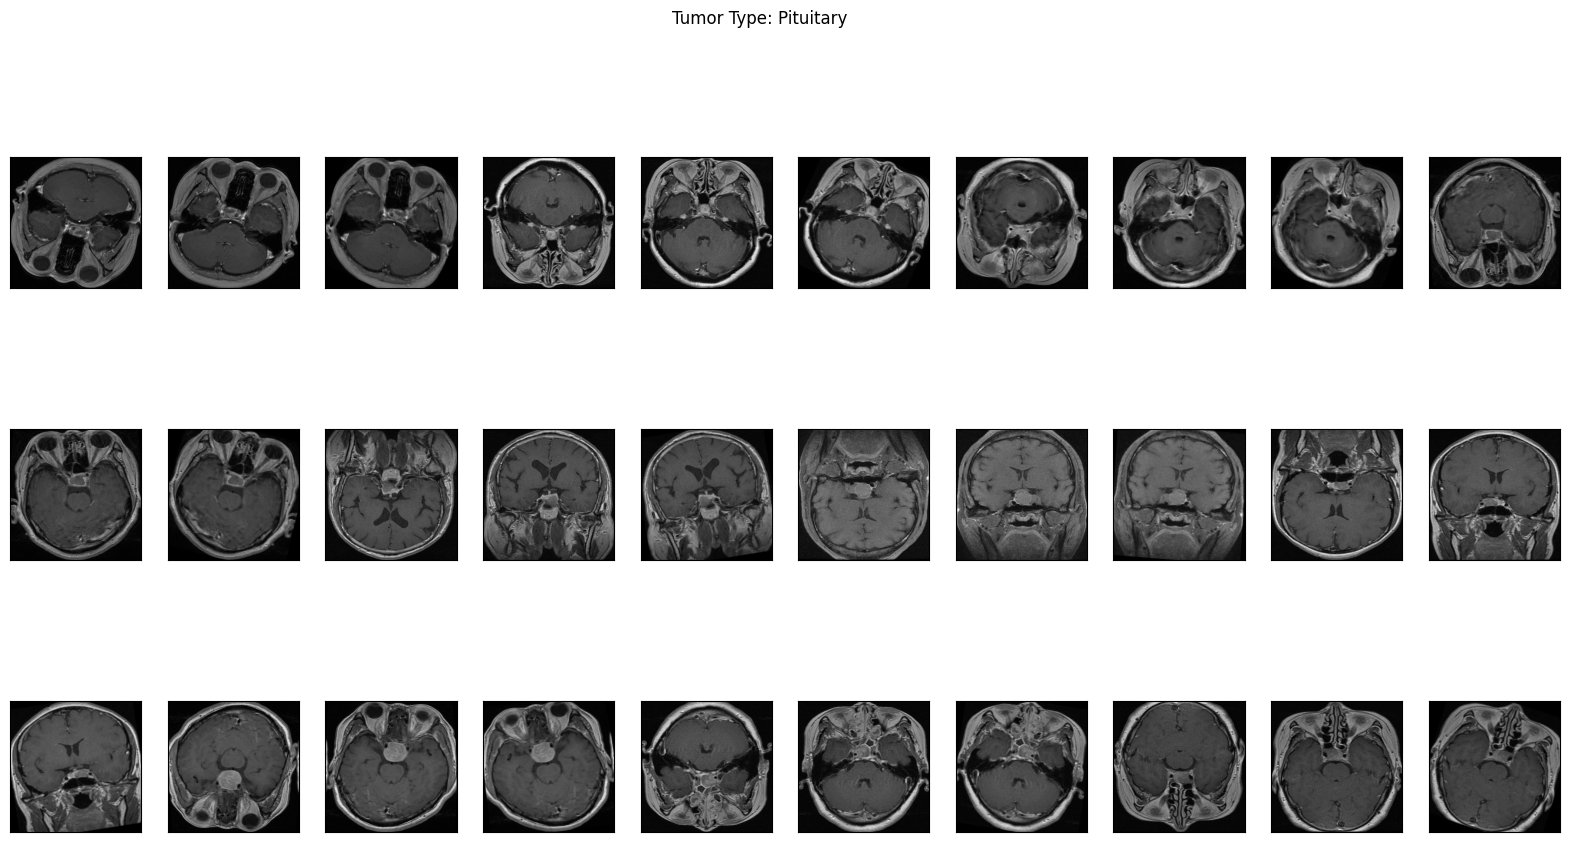

In [10]:
# Samples of 30 images of augmented data from each class
plot_sample_images(augmented_x_input_np, augmented_y_output_np, n=30)

### Merging data and Exporting outputs

All preprocessed data are combined and are exported into numpy format stored in directory prepared_data. You can access them and just see how to manipulate them using test.ipynb

In [11]:
# Merge the original and augmented data for both x_inputs and y_outputs
x_input_combined_np = np.concatenate((x_input_np, augmented_x_input_np), axis=0)
y_output_combined_np = np.concatenate((y_output_np, augmented_y_output_np), axis=0)

# Save merged data as NumPy arrays
np.save("prepared_data/x_input_combined.npy", x_input_combined_np)
np.save("prepared_data/y_output_combined.npy", y_output_combined_np)

# Save it in CSV Format just for checking
x_input_combined_2d = x_input_combined_np.reshape(-1, 1)
np.savetxt("prepared_data/x_input_combined.txt", x_input_combined_2d, delimiter=",")
np.savetxt("prepared_data/y_output_combined.txt", y_output_combined_np, delimiter=",")